<a href="https://colab.research.google.com/github/yangyuwang/painting_style_prediction/blob/main/P2_Yangyu_Avi_Gio_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Style Probability by Painting Features

Author: Yangyu Wang, Gio Choi, Avi Oberoi

Date: 02/11/2025

## Table of Contents

1. [Data Preprocessing](#Data-Preprocessing)
2. [Tree-based Model](#Tree-based-Model:-Random-Forest)
3. [Linear Model](#Linear-Model)
4. [Model Comparison & Results](#Model-Comparison-&-Results)

## Data Preprocessing

### Data Loading


In [ ]:
import pandas as pd

file_id = '1Wa_MueOpfdXZveRS5J-eMLyaBQ-SeFtN'
uuid = '6139ffcf-19c1-46b4-b013-a33b11655f4d'
at = 'AIrpjvPTjK6nk2lXSIJKc8rBEEqH:1739041451599'

download_url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0&confirm=t&uuid={uuid}&at={at}'

artwork_df = pd.read_csv(download_url)

print(artwork_df.head())

<ipython-input-51-6b2a049c1cbd>:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  artwork_df = pd.read_csv(download_url)


  Artist_name                 Artwork.Name  Year  \
0          3d               No Great Crime  1983   
1          3d                           3D  1984   
2          3d                   Wild Bunch  1984   
3          3d                  Serious Art  1986   
4          3d  Robert De Niro, Taxi Driver  1988   

                                                Link  \
0  https://www.wikiart.org/en/3d/no-great-crime-1983   
1              https://www.wikiart.org/en/3d/3d-1984   
2      https://www.wikiart.org/en/3d/wild-bunch-1984   
3     https://www.wikiart.org/en/3d/serious-art-1986   
4  https://www.wikiart.org/en/3d/robert-de-niro-t...   

                                                 url  Create.Date  \
0  https://www.wikiart.org/en/3d/no-great-crime-1983       1983.0   
1              https://www.wikiart.org/en/3d/3d-1984       1984.0   
2      https://www.wikiart.org/en/3d/wild-bunch-1984       1984.0   
3     https://www.wikiart.org/en/3d/serious-art-1986       1986.0   
4  ht

In [ ]:
!kaggle datasets download -d yangyuwang/wikiart-images -p /content/artworks/

Dataset URL: https://www.kaggle.com/datasets/yangyuwang/wikiart-images
License(s): MIT
100% 29.7G/29.7G [23:26<00:00, 21.4MB/s]
100% 29.7G/29.7G [23:26<00:00, 22.6MB/s]


In [ ]:
! unzip /content/artworks/wikiart-images.zip -d /content/artworks/

Streaming output truncated to the last 5000 lines.
  inflating: /content/artworks/artwork_picture/00193/00193623.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193623.json  
  inflating: /content/artworks/artwork_picture/00193/00193623.txt  
  inflating: /content/artworks/artwork_picture/00193/00193624.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193624.json  
  inflating: /content/artworks/artwork_picture/00193/00193624.txt  
  inflating: /content/artworks/artwork_picture/00193/00193625.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193625.json  
  inflating: /content/artworks/artwork_picture/00193/00193625.txt  
  inflating: /content/artworks/artwork_picture/00193/00193626.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193626.json  
  inflating: /content/artworks/artwork_picture/00193/00193626.txt  
  inflating: /content/artworks/artwork_picture/00193/00193627.jpg  
  inflating: /content/artworks/artwork_picture/00193/00193627

### Import Dependencies

In [ ]:
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-yx6f2hha
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-yx6f2hha
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import json
from PIL import Image
from tqdm import tqdm

import torch
from torch.utils.data import Dataset, DataLoader

import clip

### Data Cleaning


In [ ]:
ARTWORK_DIR = '/content/artworks/artwork_picture'
df = artwork_df

# Keep only the columns that are necessary
cols_to_keep = ['Artwork_ID', 'Artist_name', 'Year', 'image_n', 'Style_Category']
df = df[cols_to_keep]

# Drop rows where essential info is missing
df = df.dropna(subset=['image_n', 'Artwork_ID'])

# Filter out rare classes in Style_Category
MIN_SAMPLES = 100  # threshold
style_counts = df['Style_Category'].value_counts()
valid_styles = style_counts[style_counts >= MIN_SAMPLES].index.tolist()
df = df[df['Style_Category'].isin(valid_styles)].reset_index(drop=True)

In [ ]:
df.size

758620

### Define the Dataset and Transforms


In [ ]:
class ArtworkDataset(Dataset):
    """
    A PyTorch Dataset for loading artwork images from the local directory.
    The image file name is constructed from the 'image_n' column (zero-padded to 8 digits).
    """
    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing artwork metadata.
            image_dir (str): Directory where the image (and JSON) files are stored.
            transform (callable, optional): Transform to be applied on a PIL image.
        """
        self.data = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image_n = row['image_n']
        try:
            # Convert image_n to integer and format as an 8-digit zero-padded string.
            image_filename = f"{int(image_n):08d}.jpg"
        except Exception:
            image_filename = f"{str(image_n).zfill(8)}.jpg"

        subdirectory = f"{int(image_n) // 1000:05d}"

        image_path = os.path.join(self.image_dir, subdirectory, image_filename)

        # Load the image from disk.
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            # In case of error, create a blank image.
            image = Image.new('RGB', (224, 224))

        # Apply the transform
        if self.transform:
            image = self.transform(image)

        artwork_id = row['Artwork_ID']
        return image, artwork_id

### Load the CLIP Model for Feature Extraction

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the CLIP model and its associated preprocessing pipeline.
# Here we use the "ViT-B/32" variant.
model, clip_preprocess = clip.load("ViT-B/32", device=device)
model.eval()  # set model to evaluation mode

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

### Create the Dataset and DataLoader

In [ ]:
# Use CLIP's provided preprocessing transform so that the images are resized, center-cropped,
# and normalized in the way CLIP expects.
dataset = ArtworkDataset(df, image_dir=ARTWORK_DIR, transform=clip_preprocess)

# Create a DataLoader to iterate through the dataset in batches.
BATCH_SIZE = 32
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

### Feature Extraction Loop using CLIP

In [ ]:
# Dictionary to store features for each artwork (key: Artwork_ID, value: feature vector)
features_dict = {}

with torch.no_grad():
    for images, artwork_ids in tqdm(dataloader, desc="Extracting CLIP features", total=len(dataloader)):
        images = images.to(device)
        # Use CLIP's image encoder to obtain feature embeddings.
        image_features = model.encode_image(images)
        # Normalize the features (CLIP often uses normalized embeddings).
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        feats_np = image_features.cpu().numpy()

        # Store the embedding for each artwork.
        for art_id, feat in zip(artwork_ids, feats_np):
            features_dict[art_id] = feat

Extracting CLIP features:   4%|▎         | 172/4742 [00:13<06:00, 12.67it/s]


KeyboardInterrupt: 

### Merge the Features for Downstream Analysis

In [ ]:
features_df = pd.DataFrame({
    'Artwork_ID': list(features_dict.keys()),
    'Feature': list(features_dict.values())
})

features_df['Artwork_ID'] = features_df['Artwork_ID'].astype(df['Artwork_ID'].dtype)

final_df = pd.merge(df, features_df, on='Artwork_ID', how='inner')

final_df.to_csv("artwork_with_clip_features.csv", index=False)


CLIP feature extraction complete. Features saved to 'artwork_clip_features.npy' and 'artwork_with_clip_features.csv'.


In [ ]:
from google.colab import files
files.download('artwork_with_clip_features.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### EDA

#### Processing data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
painting_feature = pd.read_csv("data/artwork_with_clip_features.csv")

In [ ]:
def string_to_array(s):
    '''
    Change the string-like array into numpy.array
    Parameter:
        s: string to change with an array structure
    Output: array
    '''
    return np.fromstring(s.strip("[]"), sep=" ").tolist()

painting_feature['Feature_array'] = painting_feature['Feature'].apply(string_to_array)

In [ ]:
print(painting_feature['Feature_array'][0][0])

0.035522


In [ ]:
len(set(painting_feature["Style_Category"]))

16

In [ ]:
painting_feature.head()

,Artwork_ID,Artist_name,Year,image_n,Style_Category,Feature,Feature_array
0,9,a-y-jackson,1919,46467,Impressionism & Post-Impressionism,[ 3.5522e-02 -5.0446e-02 3.7323e-02 1.8173e-...,"[0.035522, -0.050446, 0.037323, 0.018173, -0.0..."
1,10,a-y-jackson,1918,73382,Art Nouveau & Deco,[-2.8248e-03 -2.7283e-02 2.2278e-02 1.8936e-...,"[-0.0028248, -0.027283, 0.022278, 0.018936, -0..."
2,11,a-y-jackson,1951,64112,Impressionism & Post-Impressionism,[ 3.4515e-02 -7.7515e-03 3.0270e-03 1.6342e-...,"[0.034515, -0.0077515, 0.003027, 0.016342, -0...."
3,12,a-y-jackson,1920,2173,Impressionism & Post-Impressionism,[-1.0796e-02 7.4120e-03 1.1635e-02 4.5807e-...,"[-0.010796, 0.007412, 0.011635, 0.045807, 0.00..."
4,13,a-y-jackson,1933,74330,Art Nouveau & Deco,[-1.3092e-02 -1.0653e-03 5.2887e-02 -4.5700e-...,"[-0.013092, -0.0010653, 0.052887, -0.00457, -0..."


Here we do not directly encode the Style_Category, because for tree-based and linear model, y should be encoded in different ways. Detailed processing on the y, please check each part.

#### Visualization by Years and Style categories

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
painting_feature_nondup = painting_feature.drop_duplicates("image_n")

In [ ]:
yearly_counts = painting_feature_nondup.groupby("Year").size().reset_index(name="Artwork_Count")

In [ ]:
yearly_counts["Year"] = yearly_counts["Year"].astype(int)

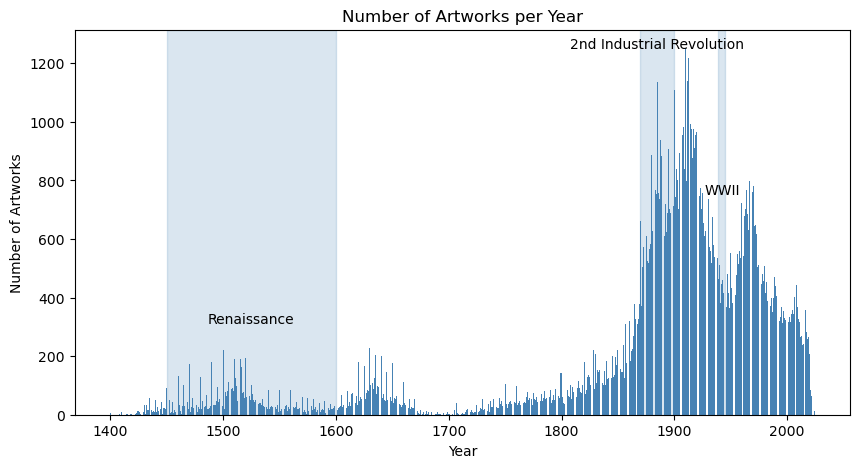

In [ ]:
plt.figure(figsize=(10, 5))
ax = plt.bar(data=yearly_counts, x="Year", height="Artwork_Count", color="steelblue")

plt.xlabel("Year")
plt.ylabel("Number of Artworks")
plt.title("Number of Artworks per Year")

plt.axvspan(1450, 1600, color='steelblue', alpha=0.2)
plt.text(1525, yearly_counts["Artwork_Count"].max() * 0.25, "Renaissance", fontsize=10, color="black", ha='center')

plt.axvspan(1870, 1900, color='steelblue', alpha=0.2)
plt.text(1885, yearly_counts["Artwork_Count"].max() * 1, "2nd Industrial Revolution", fontsize=10, color="black", ha='center')

plt.axvspan(1939, 1945, color='steelblue', alpha=0.2)
plt.text(1942.5, yearly_counts["Artwork_Count"].max() * 0.6, "WWII", fontsize=10, color="black", ha='center')
plt.savefig('img/EDA/counts_year.png', dpi=300, bbox_inches='tight')
plt.show()

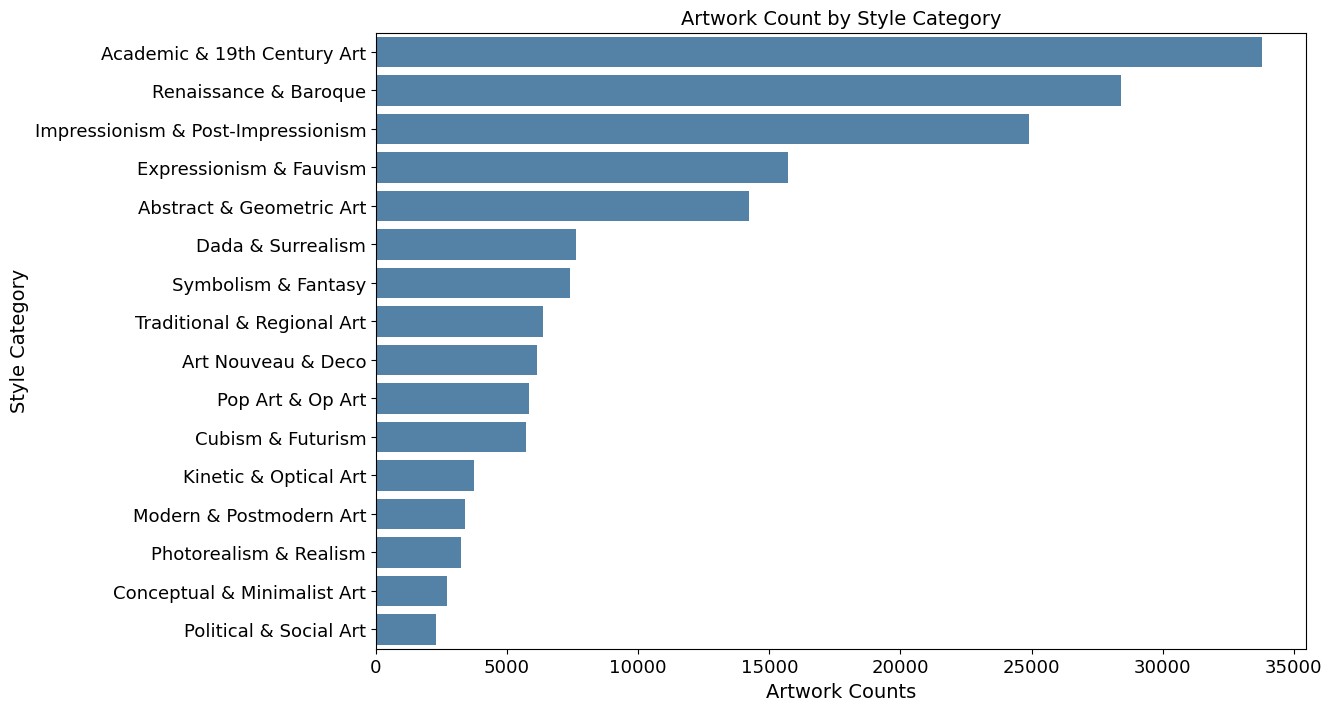

In [ ]:
style_counts = painting_feature["Style_Category"].value_counts().reset_index()
style_counts.columns = ["Style_Category", "Count"]

plt.figure(figsize=(12, 8))
sns.barplot(data=style_counts, x="Count", y="Style_Category", color="steelblue")
plt.xlabel("Artwork Counts", fontsize=14)
plt.ylabel("Style Category", fontsize=14)
plt.title("Artwork Count by Style Category", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('img/EDA/counts_category.png', dpi=300, bbox_inches='tight')
plt.show()

#### Dimensionality Reduction & *Visualization*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import mahalanobis

In [3]:
file_id = '1WotUcEGORHhM47x7HNbfo8rL08XD0KHs'

download_url = f'https://drive.usercontent.google.com/download?id={file_id}&export=download&authuser=0&confirm=t'

df = pd.read_csv(download_url)

print(df.head())

   Artwork_ID  Artist_name  Year  image_n                      Style_Category  \
0           9  a-y-jackson  1919    46467  Impressionism & Post-Impressionism   
1          10  a-y-jackson  1918    73382                  Art Nouveau & Deco   
2          11  a-y-jackson  1951    64112  Impressionism & Post-Impressionism   
3          12  a-y-jackson  1920     2173  Impressionism & Post-Impressionism   
4          13  a-y-jackson  1933    74330                  Art Nouveau & Deco   

                                             Feature  
0  [ 3.5522e-02 -5.0446e-02  3.7323e-02  1.8173e-...  
1  [-2.8248e-03 -2.7283e-02  2.2278e-02  1.8936e-...  
2  [ 3.4515e-02 -7.7515e-03  3.0270e-03  1.6342e-...  
3  [-1.0796e-02  7.4120e-03  1.1635e-02  4.5807e-...  
4  [-1.3092e-02 -1.0653e-03  5.2887e-02 -4.5700e-...  


In [2]:
sns.set(style="whitegrid", font_scale=1.2)

In [4]:
def parse_feature(x):
    if isinstance(x, str):
        try:
            # Remove brackets and split by spaces
            x = re.sub(r'\[|\]', '', x)
            x = x.split()
            # Convert each element to float and create a numpy array
            return np.array([float(element) for element in x])
        except Exception as e:
            print("Error parsing feature:", e, "Original string:", x)
            return None
    return x

df["Feature"] = df["Feature"].apply(parse_feature)
# Drop any rows where parsing failed
df = df[df["Feature"].notnull()].reset_index(drop=True)

# Stack features into a matrix
X = np.stack(df["Feature"].values)
print("Feature matrix shape:", X.shape)

Feature matrix shape: (171430, 512)


##### PCA & t-SNE Analysis


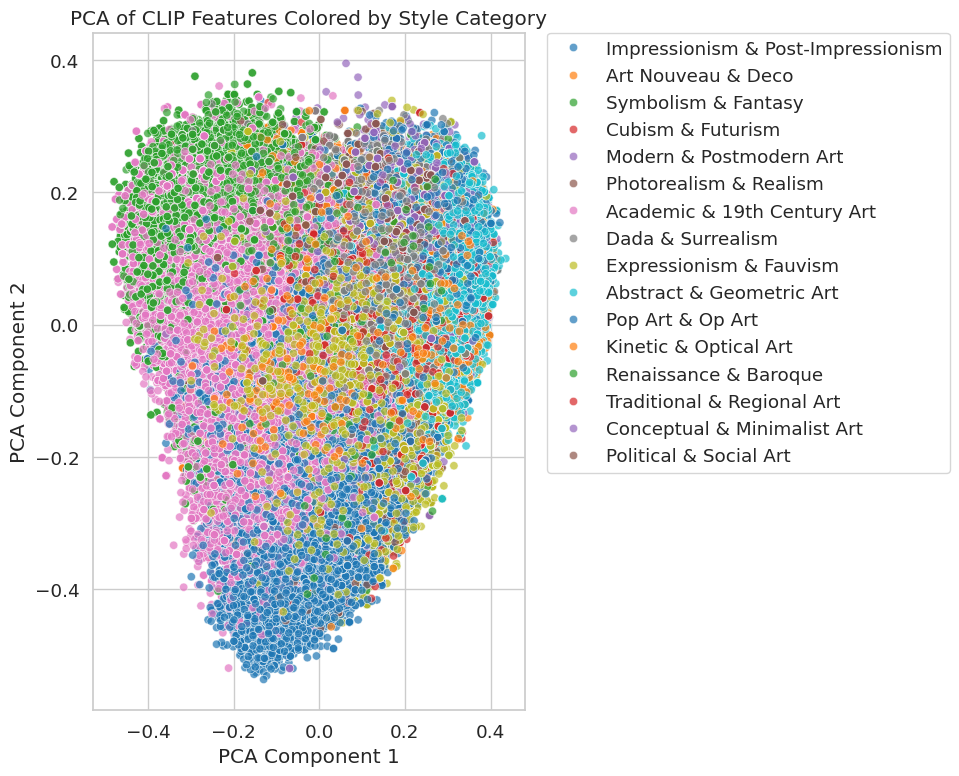

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


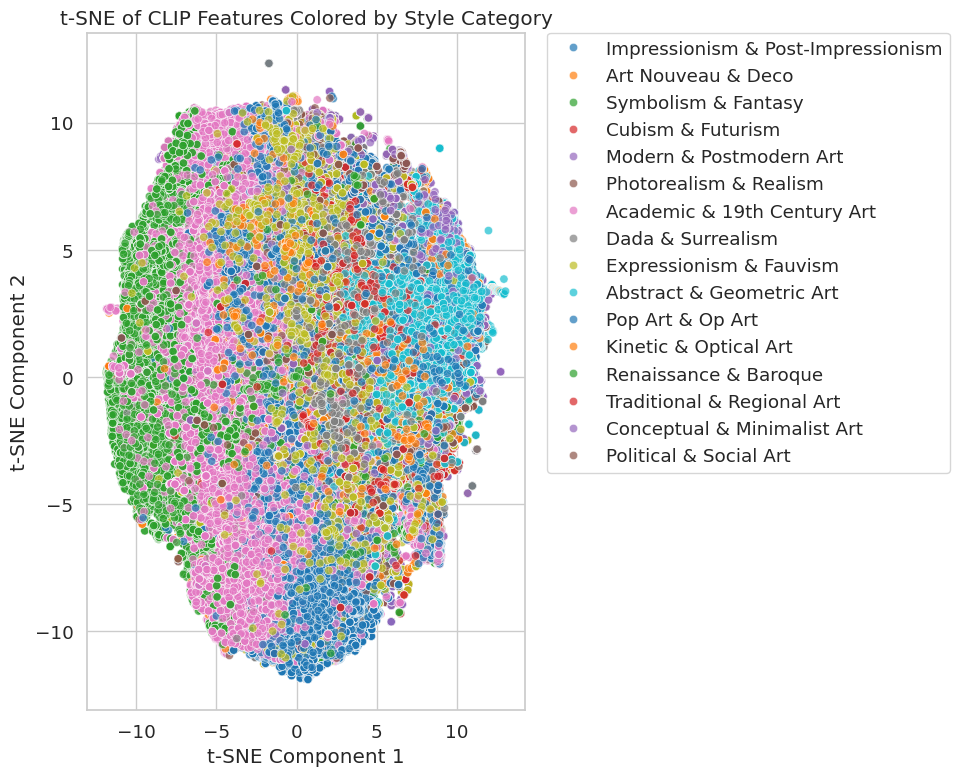

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x="PCA1", y="PCA2", hue="Style_Category", data=df, palette="tab10", alpha=0.7)
plt.title("PCA of CLIP Features Colored by Style Category")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)
df["TSNE1"] = X_tsne[:, 0]
df["TSNE2"] = X_tsne[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="Style_Category", data=df, palette="tab10", alpha=0.7)
plt.title("t-SNE of CLIP Features Colored by Style Category")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

##### Determining the Best PCA Dimension (Scree Plot)

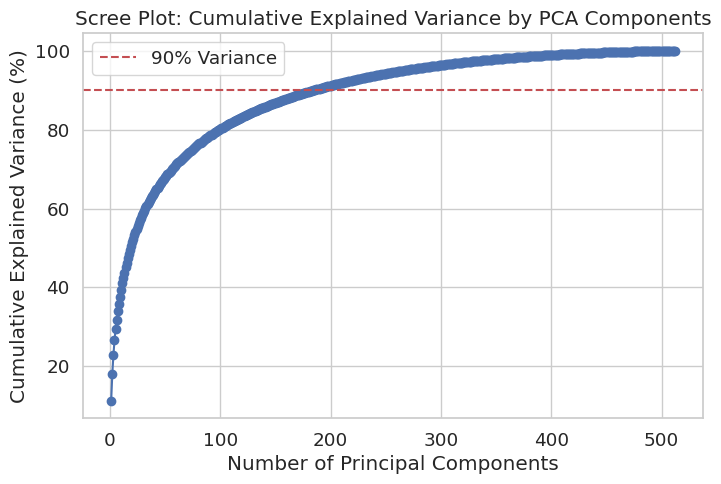

In [5]:
# In practice, we fit PCA only on training data to avoid data leakage.

# Fit PCA with all possible components up to the dimension of 512
pca_full = PCA()
pca_full.fit(X)

# Scree Plot: cumulative explained variance vs. number of components
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
components_range = range(1, len(cumulative_variance) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components_range, cumulative_variance, marker='o')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance')
plt.title("Scree Plot: Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.legend()
plt.grid(True)
plt.show()

- From the plot, 200 components give you ~90% explained variance


### Split on training and testing dataset

Because of the imbalanced structure of our dataset, we sample 800 for each categories to train the model and 200 to test.

In [8]:
from sklearn.model_selection import train_test_split

train_samples = []
test_samples = []

for style, group in df.groupby('Style_Category'):
    train_sample, test_sample = train_test_split(group, train_size=800, test_size=200, random_state=42, stratify=group['Style_Category'])

    train_samples.append(train_sample)
    test_samples.append(test_sample)

balanced_train_df = pd.concat(train_samples)
balanced_test_df = pd.concat(test_samples)

In [13]:
len(balanced_train_df)

12800

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [18]:
X_train = np.vstack(balanced_train_df["Feature"])
y_train = np.array(balanced_train_df['Style_Category'])
y_train = label_encoder.fit_transform(y_train)

X_test = np.vstack(balanced_test_df["Feature"])
y_test = np.array(balanced_test_df['Style_Category'])
y_test = label_encoder.fit_transform(y_test)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (12800, 512), y_train shape: (12800,)
X_test shape: (3200, 512), y_test shape: (3200,)


### Outlier Detection on Training Set


In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
# Used IsolationForest
# "contamination" controls the % of points to be flagged as outliers.
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict + keep only inliers
inlier_mask = (iso_forest.predict(X_train) == 1)
X_train_inliers = X_train[inlier_mask]
y_train_inliers = y_train[inlier_mask]

print(f"Original training size: {len(X_train)}")
print(f"Training size after removing outliers: {len(X_train_inliers)}")

Original training size: 12800
Training size after removing outliers: 12672


### Standardization


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_inliers)
X_test_scaled = scaler.transform(X_test)

### Dimensionality Reduction with PCA


In [22]:
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Tree-based Model: Random Forest

1. Data processing

We chose label encoder here, for tree-based do not require any additional encoding to deal with tasks.

2. Random Forest & Model Evaluation

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [25]:
rfc_base = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc_base.fit(X_train_pca, y_train_inliers)
np.round(rfc_base.score(X_test_pca,y_test),3)

0.506

In [26]:
y_pred_rfc_base = rfc_base.predict(X_test_pca)
y_probs_rfc_base = rfc_base.predict_proba(X_test_pca)
confusion_matrix(y_test, y_pred_rfc_base, labels=rfc_base.classes_)

array([[ 75,   0,   0,  19,  17,  10,   3,   0,  52,   2,   3,   1,  10,
          0,   1,   7],
       [  0, 103,   6,   2,   1,   1,   0,  29,   0,   4,   5,   5,   0,
         35,   8,   1],
       [  1,  17,  99,   2,   6,   6,   6,  16,   1,   1,   4,  13,   5,
          7,  10,   6],
       [ 16,   0,   1, 142,   1,   5,   2,   0,   6,   2,   4,   5,  14,
          0,   1,   1],
       [  4,   1,   5,   1, 141,  19,  15,   6,   2,   0,   1,   2,   3,
          0,   0,   0],
       [  6,   4,   7,  13,  32,  74,   6,   3,  11,   3,   8,   2,   7,
          4,  13,   7],
       [  0,  10,   9,   1,  31,  11,  67,  28,  12,   7,   2,   3,   4,
          1,   7,   7],
       [  1,  19,   7,   0,   0,   1,   9, 149,   0,   1,   5,   1,   0,
          2,   3,   2],
       [ 24,   0,   0,   9,   4,   8,   2,   1, 141,   1,   0,   0,   6,
          0,   1,   3],
       [ 10,   4,   1,  17,   2,   7,   8,  13,  16,  75,  16,  10,   9,
          4,   3,   5],
       [  1,  13,   3,  14,   

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_pred_rfc_base, average='macro', zero_division=np.nan), 3)
recall = round(recall_score(y_test, y_pred_rfc_base, average='macro', zero_division=np.nan), 3)
f1 = round(f1_score(y_test, y_pred_rfc_base, average='macro', zero_division=np.nan), 3)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Precision: 0.504
Recall: 0.506
F1: 0.495


In [28]:
print(classification_report(y_test, y_pred_rfc_base, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.47      0.38      0.42       200
           1       0.44      0.52      0.48       200
           2       0.49      0.49      0.49       200
           3       0.54      0.71      0.61       200
           4       0.52      0.70      0.60       200
           5       0.40      0.37      0.39       200
           6       0.40      0.34      0.36       200
           7       0.49      0.74      0.59       200
           8       0.49      0.70      0.58       200
           9       0.53      0.38      0.44       200
          10       0.51      0.42      0.46       200
          11       0.51      0.42      0.46       200
          12       0.45      0.33      0.38       200
          13       0.72      0.85      0.78       200
          14       0.52      0.35      0.42       200
          15       0.58      0.40      0.47       200

    accuracy                           0.51      3200
   macro avg       0.50   

In [30]:
roc_score_1 = roc_auc_score(y_test, y_probs_rfc_base, multi_class='ovo')
roc_score_1

0.8896254166666666

In [34]:
y_test_bin = label_binarize(y_test, classes=rfc_base.classes_)

roc_per_class_1 = roc_auc_score(y_test_bin, y_probs_rfc_base, average=None)

for style, roc in zip(rfc_base.classes_, roc_per_class_1):
    original_style = label_encoder.inverse_transform([style])[0]
    print("ROC-AUC for", original_style + ":", roc)

ROC-AUC for Abstract & Geometric Art: 0.8994
ROC-AUC for Academic & 19th Century Art: 0.9154391666666667
ROC-AUC for Art Nouveau & Deco: 0.8926533333333334
ROC-AUC for Conceptual & Minimalist Art: 0.9417599999999999
ROC-AUC for Cubism & Futurism: 0.9213325
ROC-AUC for Dada & Surrealism: 0.85746
ROC-AUC for Expressionism & Fauvism: 0.8030933333333334
ROC-AUC for Impressionism & Post-Impressionism: 0.9330425
ROC-AUC for Kinetic & Optical Art: 0.9493683333333334
ROC-AUC for Modern & Postmodern Art: 0.8560924999999999
ROC-AUC for Photorealism & Realism: 0.8752525
ROC-AUC for Political & Social Art: 0.8842041666666668
ROC-AUC for Pop Art & Op Art: 0.8341091666666666
ROC-AUC for Renaissance & Baroque: 0.9862125
ROC-AUC for Symbolism & Fantasy: 0.8331366666666667
ROC-AUC for Traditional & Regional Art: 0.85145


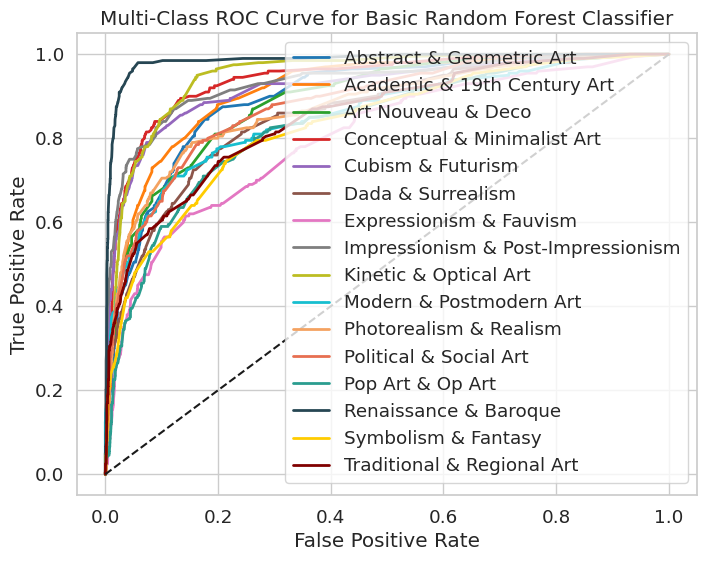

In [37]:
n_classes = len(rfc_base.classes_)

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#f4a261", "#e76f51", "#2a9d8f", "#264653", "#ffcc00", "#800000"
]

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_rfc_base[:, i])
    original_class_name = label_encoder.inverse_transform([rfc_base.classes_[i]])[0]
    plt.plot(fpr, tpr, lw=2, color=color, label=original_class_name)

plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for Basic Random Forest Classifier")
plt.legend()
#plt.savefig('img/tree_model/ROC_Curve_basic_rfc.png', dpi=300, bbox_inches='tight')
plt.show()

3. Grid search to fine tune the model

We try to change the __max_depth__ (the depth of trees), __max_features__ (maximum number of features used in single tree), and __max_samples__ (maximum number of samples used in single tree).

Here, we focus on the roc-auc of the model, because the model is not used to categorize paintings. Instead, the model is to generate prabilities. As a result, a higher roc-auc means the probabilities between difference labels have higher stratification, which is better for our task.

In [38]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from tqdm import tqdm

In [39]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)

param_grid = {
    'max_depth': [10, 20, None],
    'max_features': [5, 20, None],
    'max_samples': [0.5, 0.8, None]
}

param_list = list(ParameterGrid(param_grid))
print(f"Total parameter combinations: {len(param_list)}")

Total parameter combinations: 27


In [40]:
best_params = None
best_test_auc = 0
best_rfc = None

param_grid_record = param_grid.copy()

with tqdm(param_list, desc="Grid Search Progress") as pbar:
    for params in pbar:
        rfc = RandomForestClassifier(**params, criterion="entropy", random_state=42)
        rfc.fit(X_train_pca, y_train_inliers)

        y_pred = rfc.predict(X_test_pca)
        y_pred_probs = rfc.predict_proba(X_test_pca)
        test_auc = roc_auc_score(y_test, y_pred_probs, multi_class="ovo")
        test_accuracy = rfc.score(X_test_pca, y_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')

        param_grid_record["roc-auc"] = param_grid_record.get("roc-auc", []) + [test_auc]
        param_grid_record["accuracy"] = param_grid_record.get("accuracy", []) + [test_accuracy]
        param_grid_record["f1"] = param_grid_record.get("f1", []) + [test_f1]

        if test_auc > best_test_auc:
            best_test_auc = test_auc
            best_params = params
            best_rfc = rfc

        pbar.set_postfix({"Best AUC": f"{best_test_auc:.4f}"})

        print({"Accuracy": f"{test_accuracy:.4f}", "AUC": f"{test_auc:.4f}"})

print("Best parameters:", best_params)
print(f"Best Test AUC: {best_test_auc:.4f}")

Grid Search Progress:   4%|▎         | 1/27 [00:15<06:48, 15.72s/it, Best AUC=0.8808]

{'Accuracy': '0.4822', 'AUC': '0.8808'}


Grid Search Progress:   7%|▋         | 2/27 [00:37<07:56, 19.06s/it, Best AUC=0.8915]

{'Accuracy': '0.4803', 'AUC': '0.8915'}


Grid Search Progress:  11%|█         | 3/27 [01:01<08:38, 21.62s/it, Best AUC=0.8915]

{'Accuracy': '0.4725', 'AUC': '0.8866'}


Grid Search Progress:  15%|█▍        | 4/27 [01:57<13:23, 34.91s/it, Best AUC=0.9060]

{'Accuracy': '0.4828', 'AUC': '0.9060'}


Grid Search Progress:  19%|█▊        | 5/27 [03:13<18:19, 49.96s/it, Best AUC=0.9068]

{'Accuracy': '0.4963', 'AUC': '0.9068'}


Grid Search Progress:  22%|██▏       | 6/27 [04:42<22:04, 63.06s/it, Best AUC=0.9084]

{'Accuracy': '0.4906', 'AUC': '0.9084'}


Grid Search Progress:  26%|██▌       | 7/27 [12:39<1:06:07, 198.35s/it, Best AUC=0.9084]

{'Accuracy': '0.4916', 'AUC': '0.9001'}


Grid Search Progress:  30%|██▉       | 8/27 [24:07<1:52:14, 354.44s/it, Best AUC=0.9084]

{'Accuracy': '0.4934', 'AUC': '0.9051'}


Grid Search Progress:  33%|███▎      | 9/27 [37:22<2:27:36, 492.03s/it, Best AUC=0.9084]

{'Accuracy': '0.4884', 'AUC': '0.9034'}


Grid Search Progress:  37%|███▋      | 10/27 [37:42<1:38:10, 346.51s/it, Best AUC=0.9084]

{'Accuracy': '0.4475', 'AUC': '0.8537'}


Grid Search Progress:  41%|████      | 11/27 [38:10<1:06:24, 249.02s/it, Best AUC=0.9084]

{'Accuracy': '0.4619', 'AUC': '0.8587'}


Grid Search Progress:  44%|████▍     | 12/27 [38:43<45:47, 183.14s/it, Best AUC=0.9084]  

{'Accuracy': '0.4603', 'AUC': '0.8581'}


Grid Search Progress:  48%|████▊     | 13/27 [39:44<34:06, 146.14s/it, Best AUC=0.9084]

{'Accuracy': '0.5006', 'AUC': '0.8983'}


Grid Search Progress:  52%|█████▏    | 14/27 [41:14<27:59, 129.16s/it, Best AUC=0.9084]

{'Accuracy': '0.5134', 'AUC': '0.9003'}


Grid Search Progress:  56%|█████▌    | 15/27 [42:59<24:24, 122.08s/it, Best AUC=0.9084]

{'Accuracy': '0.5094', 'AUC': '0.8970'}


Grid Search Progress:  59%|█████▉    | 16/27 [51:23<43:27, 237.02s/it, Best AUC=0.9084]

{'Accuracy': '0.4969', 'AUC': '0.8983'}


Grid Search Progress:  63%|██████▎   | 17/27 [1:03:51<1:05:04, 390.40s/it, Best AUC=0.9084]

{'Accuracy': '0.5031', 'AUC': '0.9019'}


Grid Search Progress:  67%|██████▋   | 18/27 [1:18:21<1:20:13, 534.78s/it, Best AUC=0.9084]

{'Accuracy': '0.5053', 'AUC': '0.9000'}


Grid Search Progress:  70%|███████   | 19/27 [1:18:41<50:40, 380.10s/it, Best AUC=0.9084]  

{'Accuracy': '0.4612', 'AUC': '0.8505'}


Grid Search Progress:  74%|███████▍  | 20/27 [1:19:09<32:00, 274.39s/it, Best AUC=0.9084]

{'Accuracy': '0.4575', 'AUC': '0.8591'}


Grid Search Progress:  78%|███████▊  | 21/27 [1:19:43<20:12, 202.06s/it, Best AUC=0.9084]

{'Accuracy': '0.4678', 'AUC': '0.8578'}


Grid Search Progress:  81%|████████▏ | 22/27 [1:20:44<13:18, 159.75s/it, Best AUC=0.9084]

{'Accuracy': '0.5028', 'AUC': '0.8975'}


Grid Search Progress:  85%|████████▌ | 23/27 [1:22:14<09:15, 139.00s/it, Best AUC=0.9084]

{'Accuracy': '0.5066', 'AUC': '0.8990'}


Grid Search Progress:  89%|████████▉ | 24/27 [1:23:57<06:24, 128.25s/it, Best AUC=0.9084]

{'Accuracy': '0.5169', 'AUC': '0.9002'}


Grid Search Progress:  93%|█████████▎| 25/27 [1:32:22<08:02, 241.08s/it, Best AUC=0.9084]

{'Accuracy': '0.4969', 'AUC': '0.8983'}


Grid Search Progress:  96%|█████████▋| 26/27 [1:44:50<06:33, 393.19s/it, Best AUC=0.9084]

{'Accuracy': '0.5012', 'AUC': '0.9019'}


Grid Search Progress: 100%|██████████| 27/27 [1:59:20<00:00, 265.20s/it, Best AUC=0.9084]

{'Accuracy': '0.5075', 'AUC': '0.8998'}
Best parameters: {'max_depth': 10, 'max_features': 20, 'max_samples': None}
Best Test AUC: 0.9084


In [42]:
import pickle

# Save the best model to a pickle file
with open('best_rfc_model.pkl', 'wb') as f:
    pickle.dump(best_rfc, f)

# Download the pickle file
files.download('best_rfc_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

with open("models/best_random_forest.pkl", "wb") as f:
    pickle.dump(best_rfc, f)

In [ ]:
#import pickle

#with open("models/best_random_forest.pkl", "rb") as f:
#    best_rfc = pickle.load(f)

In [43]:
imp = best_rfc.feature_importances_

imp_dict = {idx:i for idx, i in enumerate(imp)}

In [44]:
sorted(imp_dict.items(), key = lambda x: x[1], reverse=True)[:10]

[(0, 0.14545170758722065),
 (1, 0.07395014154385832),
 (5, 0.04743428108474879),
 (3, 0.04440250003199235),
 (2, 0.03972870153691273),
 (6, 0.02605205027704176),
 (4, 0.023447635047758417),
 (9, 0.018094568715307756),
 (12, 0.016918493819214883),
 (7, 0.01681811108031625)]

In [46]:
np.round(best_rfc.score(X_test_pca,y_test),3)

0.491

In [48]:
y_pred_best_rfc = best_rfc.predict(X_test_pca)
y_probs_best_rfc = best_rfc.predict_proba(X_test_pca)

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = round(precision_score(y_test, y_pred_best_rfc, average='macro', zero_division=np.nan), 3)
recall = round(recall_score(y_test, y_pred_best_rfc, average='macro', zero_division=np.nan), 3)
f1 = round(f1_score(y_test, y_pred_best_rfc, average='macro', zero_division=np.nan), 3)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')


Precision: 0.489
Recall: 0.491
F1: 0.474


In [50]:
print(classification_report(y_test, y_pred_best_rfc, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.43      0.31      0.36       200
           1       0.47      0.51      0.49       200
           2       0.52      0.45      0.48       200
           3       0.49      0.72      0.58       200
           4       0.50      0.76      0.61       200
           5       0.48      0.33      0.39       200
           6       0.35      0.22      0.27       200
           7       0.43      0.77      0.55       200
           8       0.44      0.70      0.54       200
           9       0.54      0.38      0.44       200
          10       0.47      0.38      0.42       200
          11       0.52      0.45      0.48       200
          12       0.42      0.30      0.35       200
          13       0.72      0.88      0.79       200
          14       0.49      0.29      0.37       200
          15       0.57      0.40      0.47       200

    accuracy                           0.49      3200
   macro avg       0.49   

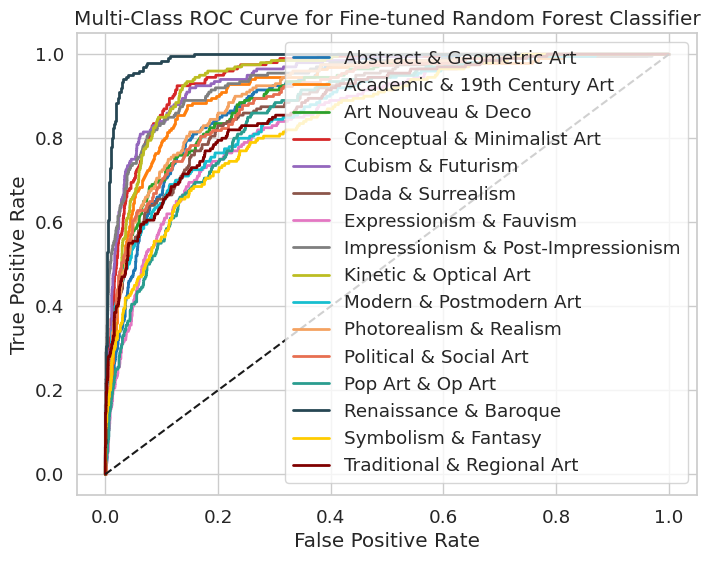

In [54]:
n_classes = len(best_rfc.classes_)

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#f4a261", "#e76f51", "#2a9d8f", "#264653", "#ffcc00", "#800000"
]

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_best_rfc[:, i])
    original_class_name = label_encoder.inverse_transform([rfc_base.classes_[i]])[0]
    plt.plot(fpr, tpr, lw=2, color=color, label=original_class_name)

plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for Fine-tuned Random Forest Classifier")
plt.legend()
#plt.savefig('img/tree_model/ROC_Curve_finetuned_rfc.png', dpi=300, bbox_inches='tight')
plt.show()

3. Interpretation: Visualize the first tree

In [55]:
import graphviz
from sklearn import tree

In [58]:
# set names
feature_names = [f"Feature {i}" for i in range(X_train_pca.shape[1])]

In [59]:
tree_dict = {}

for i in range(5):
    tree_case = best_rfc.estimators_[i]
    dot_data = tree.export_graphviz(tree_case, out_file=None,
                                feature_names=feature_names,
                                filled=True, rounded=True,
                                special_characters=False,
                                max_depth=2)

    graph = graphviz.Source(dot_data)
    tree_dict[i] = graph

In [60]:
tree_dict[0].render(f"img/tree_model//tree_{0}_depthof2", format="pdf")
tree_dict[1].render(f"img/tree_model//tree_{1}_depthof2", format="pdf")
tree_dict[2].render(f"img/tree_model//tree_{2}_depthof2", format="pdf")

'img/tree_model/tree_2_depthof2.pdf'

In [61]:
imp = pd.DataFrame(best_rfc.feature_importances_)

4. Error analysis

In [62]:
cf_matrix_best_rfc = confusion_matrix(y_test, y_pred_best_rfc, labels=best_rfc.classes_)

In [66]:
xticks = [str(idx) + ". " + label for idx, label in enumerate(label_encoder.inverse_transform(rfc_base.classes_))]

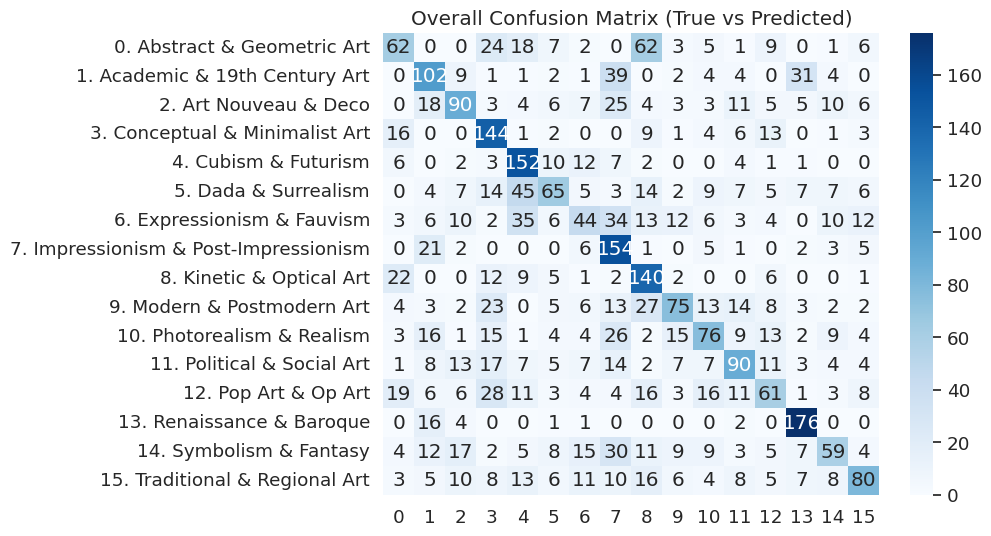

In [67]:
plt.figure(figsize=(8, 6))
plt.title("Overall Confusion Matrix (True vs Predicted)")
sns.heatmap(cf_matrix_best_rfc, annot=True, yticklabels=xticks, fmt="d",cmap='Blues')
plt.savefig('img/tree_model/confusion_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

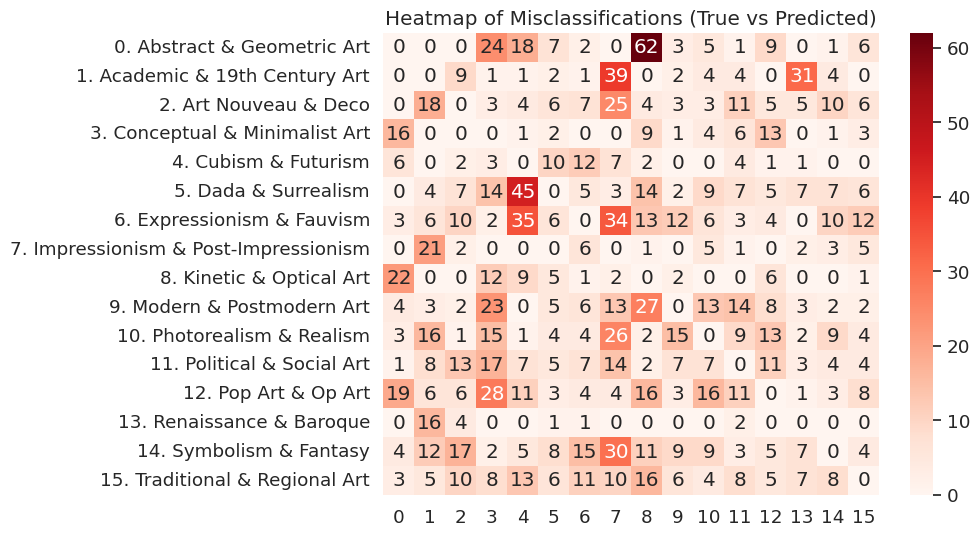

In [68]:
np.fill_diagonal(cf_matrix_best_rfc, 0)

plt.figure(figsize=(8, 6))
plt.title("Heatmap of Misclassifications (True vs Predicted)")
sns.heatmap(cf_matrix_best_rfc, annot=True, yticklabels=xticks, fmt="d",cmap='Reds')
plt.savefig('img/tree_model/error_matrix_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Linear Model

## Model-Comparison-&-Results